# METAR/TAF - Exploratory data analysis

## Analysis of one year, one airport data

The SBGR (Guarulhos, SP, Brazil airport) wind data from 2017 present some outliers, as the TAF and METAR messages have maximum wind speeds of 99kt. 

$1 kt = 0.514 m/s$

$99 kt = 50.93 m/s$

Messages samples:

**METAR SBRJ 231200Z 31015G27KT 280V350 4000 -RA SCT020 BKN120 25/20 Q1012 =**

**TAF SBPS 240100Z 2406/2506 25005KT 9000 SCT018 TN20/2408Z TX27/2415Z
PROB30 TEMPO 2408/2409 6000 SHRA SCT012 BKN017
BECMG 2411/2413 08009KT
BECMG 2502/2504 26004KT RMK PEI=**

ref: https://www.redemet.aer.mil.br

In [35]:
#graphics styles

import matplotlib
import matplotlib.pyplot as plt 

matplotlib.style.use('ggplot') 
#plt.style.available

### Reading SBGR (Gaurulhos-Brazil airport) 2017 data

In [36]:
import os
import pandas as pd
import numpy as np

db_dir ='../3.DBGenerator/output' 
df = pd.read_csv('../3.DBGenerator/output/2017/SBGR_2017.csv',index_col=0,parse_dates=[0])
#df = pd.read_csv('../3.DBGenerator/output/2016/SBGR_2016.csv',index_col=0,parse_dates=[0])
#df = pd.read_csv('../3.DBGenerator/output/2015/SBGR_2015.csv',index_col=0,parse_dates=[0])
df.head(n=100)

,metar_wind,metar_TS,metar_GRGS,metar_CB,metar_TCU,taf_wind,taf_TS,taf_GRGS,taf_CB,taf_TCU
2017-01-01 00:00:00,10.0,0.0,0.0,0.0,0.0,4.0,0,0,0,0
2017-01-01 01:00:00,7.0,0.0,0.0,0.0,0.0,4.0,0,0,0,0
2017-01-01 02:00:00,6.0,0.0,0.0,0.0,0.0,4.0,0,0,0,0
2017-01-01 03:00:00,8.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 04:00:00,5.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 05:00:00,6.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 06:00:00,6.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 07:00:00,7.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 08:00:00,4.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
2017-01-01 09:00:00,4.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0


#### Ploting SBGR 2017 METAR/TAF wind speed
This plot shows some TAF wind speeds higher than 99KT, whitch is the maximum value on TAF/METAR messages, so this lines needs to be cleaned, because they are wrong. 

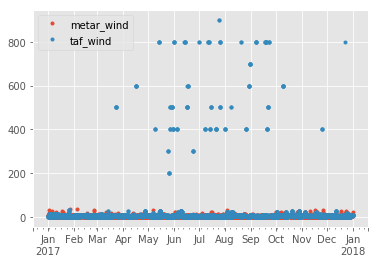

In [37]:
df.plot(y=["metar_wind","taf_wind"],style='.')

### Plot after clearing outliers

TAF and METAR data from 2017 (SBGR) were plotted, after clearing outliers.
This plot wasn't useful for comparison between predicted and measured wind speeds.

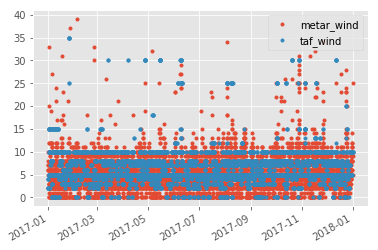

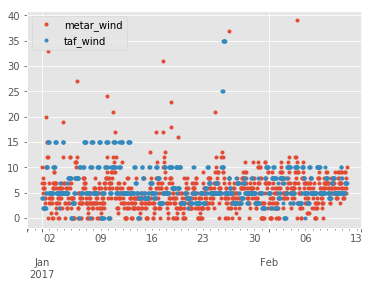

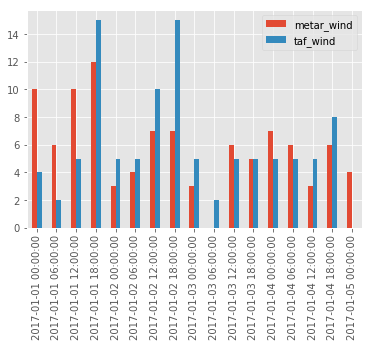

In [38]:
#clean data >99 (trash data), max 99kt on metar/taf messages
df = df[df.taf_wind<99]
df.plot(y=["metar_wind","taf_wind"],style='.')
df[0:1000].plot(y=["metar_wind","taf_wind"],style='.')
df[0:100:6].plot.bar(y=["metar_wind","taf_wind"],style='.')

## Histogram METAR/TAF of SBGR 2017
This plot shows that taf histogram is a bit more for the right than the METAR ones, whitch represents highers wind speeds than METAR on average. 

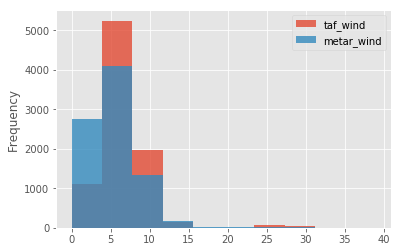

In [39]:
df[['taf_wind','metar_wind']].plot.hist(alpha=0.8)

## Scatter plot of wind speed SBGR 2017

The scatter plot below shows that, for low airspeeds, the prediction is fairly accurate, and this condition is the most frequent. For higher measured or predicted wind speeds, the accuracy of the prediction is compromised.

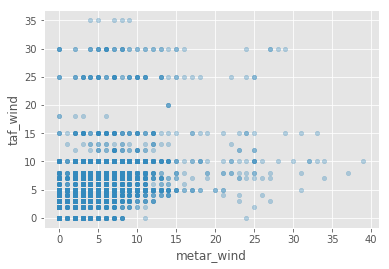

In [40]:
df.plot.scatter(x='metar_wind',y='taf_wind',alpha=1/3)
#df.plot.scatter(x='taf_wind',  y='metar_wind',alpha=1/3)

### Error RMSE

It's possible to see from RMSE, that the error on low wind speeds is lower. Up to 4kt, the RMSE is 4.26kt and from 5kt to 9kt, it's 3.5kt. Even though the complete data RMSE is quite low (4.33kt), the RMS error for wind speeds of more than 10kt increases rapidly. When wind speed is higher than 15KT, it's error is higher than 9KT.

Total RMS_wind = 4.29 kt
RMS_wind [0,4] = 4.26 on 3872 (45.04%)
RMS_wind [5,9] = 3.5 on 3920 (45.60%)
RMS_wind [10,14] = 5.65 on 558 (6.49%)
RMS_wind [15,19] = 9.32 on 46 (0.54%)
RMS_wind [20,24] = 13.7 on 32 (0.37%)
RMS_wind [25,29] = 15.2 on 25 (0.29%)
RMS_wind [30,34] = 22.3 on 10 (0.12%)
RMS_wind [35,39] = 29.0 on 2 (0.02%)


<BarContainer object of 8 artists>

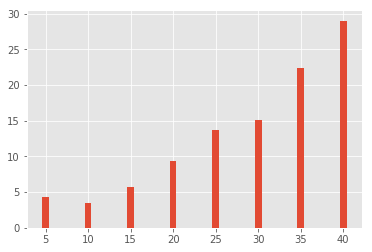

In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import bar

df['error_wind'] = abs(df['metar_wind'] - df['taf_wind']) 
rmse = (((df.error_wind**2).sum())/len(df.error_wind))**0.5
print("Total RMS_wind = {:.3} kt".format(rmse))

delta = 5
metar_wind_max = int(df.metar_wind.max()) + 5
last = 0
vrms = []
vpct = []
for i in range(5,metar_wind_max,delta):
    ndf = df[df.metar_wind.between(last,i-1)]
    rms = (((ndf.error_wind**2).sum())/len(ndf.error_wind))**0.5
    pct = len(ndf)/len(df)
    print("RMS_wind [{},{}] = {:.3} on {} ({:.2%})".format(last,i-1,rms,len(ndf),pct))
    vrms.append(rms)
    vpct.append(pct*100)
    last = i
bar(range(5,metar_wind_max,delta),vrms)

### LINEAR REGRESSION: METAR vs Error

The comparision of linear regression for METAR vs Error of completa data and only for higher wind speeds are very different. The inclination with higher wind speed is much bigger, because it's erros is much bigger. Although, the full data have the data of low wind speed, as the amount of low wind is much higher the average error is reduced.

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


def plot_regression(df,a=1/3):
    # Removes rows with NaN in them
    filtered_data = df.dropna(axis=0, how='any')

    x_y = np.array(filtered_data)
    x, y = x_y[:,0], x_y[:,1]

    # Reshaping
    x, y = x.reshape(-1,1), y.reshape(-1, 1)

    # Linear Regression Object 
    lin_regression = LinearRegression()

    # Fitting linear model to the data
    lin_regression.fit(x,y)

    # Get slope of fitted line
    m = lin_regression.coef_

    # Get y-Intercept of the Line
    b = lin_regression.intercept_

    # Get Predictions for original x values
    # you can also get predictions for new data
    predictions = lin_regression.predict(x)

    # following slope intercept form 
    print ("LINEAR REGRESSION: y = {0}x + {1}".format(m, b) )

    # Plot the Original Model (Black) and Predictions (Blue)
    df.plot.scatter(x='metar_wind',y='error_wind',alpha=a)
    plt.plot(x, predictions, color='red',linewidth=3)
    plt.show()

#### LINEAR REGRESSION: METAR vs Error Complete data

LINEAR REGRESSION: y = [[0.16711207]]x + [2.08454273]


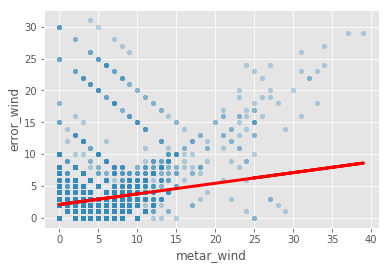

In [43]:
df_metar_error = df[['metar_wind','error_wind']]
plot_regression(df_metar_error)

#### LINEAR REGRESSION: METAR vs Error only for WIND SPEED > 10KT

LINEAR REGRESSION: y = [[0.71286025]]x + [-3.19546589]


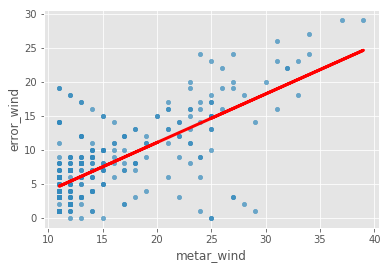

In [44]:
df_metar_error = df[['metar_wind','error_wind']]
high_wind = df_metar_error[df_metar_error.metar_wind>10]
plot_regression(high_wind,0.7)

## Scatter plot with other variables

The scatter plot with other variables shows that the growth of the error presents some relations with the presence of TS and CB in METAR, but no relations with the presence of TCU in METAR.


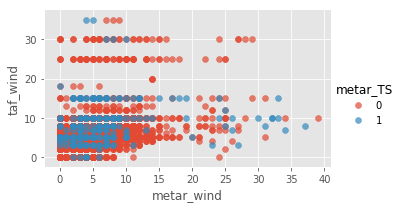

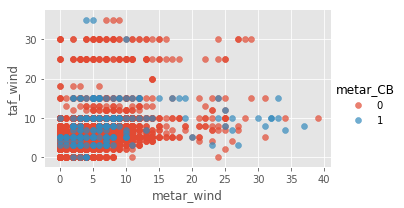

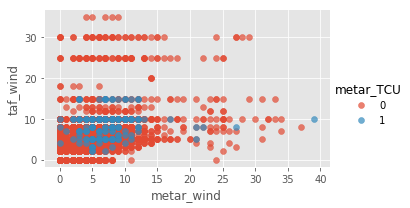

In [45]:
import seaborn 
from  matplotlib import pyplot
fg = seaborn.FacetGrid(data=df, hue='metar_TS', hue_order=[0,1], aspect=1.61)
fg.map(pyplot.scatter, 'metar_wind', 'taf_wind',alpha=0.7).add_legend()

#df[df.metar_TS==1].plot.scatter(x='metar_wind',y='taf_wind',color='red',alpha=1/5)
#df[df.metar_TS==0].plot.scatter(x='metar_wind',y='taf_wind',color='blue',alpha=1/5)

fg = seaborn.FacetGrid(data=df, hue='metar_CB', hue_order=[0,1], aspect=1.61)
fg.map(pyplot.scatter, 'metar_wind', 'taf_wind',alpha=0.7).add_legend()

fg = seaborn.FacetGrid(data=df, hue='metar_TCU', hue_order=[0,1], aspect=1.61)
fg.map(pyplot.scatter, 'metar_wind', 'taf_wind',alpha=0.7).add_legend()



## METAR by month

 The analysis of SBGR METAR of three years (2017,2016,2015) shows some patners. There are some preriods with low wind speed average compared to others. The avareges of wind speed were very similiar for 2017 and 2016, and a bit different for 2015, but whitch can be very similar shifting an month after july  


In [46]:
#function to read METAR/TAF .csv data to pandas data with drop on wind higher than 99KT
def getMetarTafDF(air_icao,year,fdir = '../3.DBGenerator/output/' ):
    dirname = fdir + year + '/' + air_icao + '_' + year + '.csv'
    airdf = pd.read_csv(dirname,index_col=0,parse_dates=[0])
    #airdf = airdf.dropna(axis=0, how='any') # remove empty values
    airdf = airdf.where(airdf.taf_wind<99)
    airdf['error_wind'] =  abs(airdf['metar_wind'] - airdf['taf_wind']) 
    return airdf

2015-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2015-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: error_wind, dtype: object

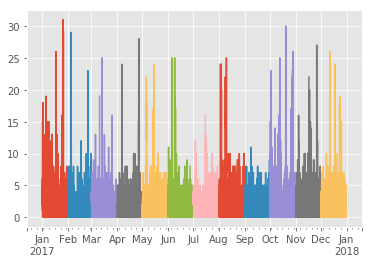

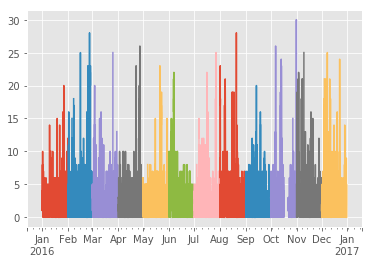

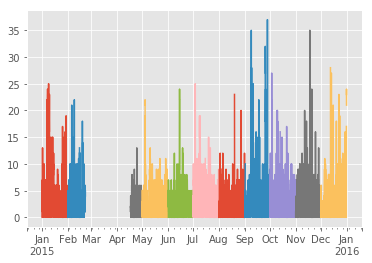

In [47]:
plt.figure()
df_SBGR_2017_month = df['error_wind'].resample('M')
df_SBGR_2017_month.plot()

plt.figure()
df_SBGR_2016 = getMetarTafDF('SBGR','2016')
df_SBGR_2016_month = df_SBGR_2016['error_wind'].resample('M')
df_SBGR_2016_month.plot()

plt.figure()
df_SBGR_2015= getMetarTafDF('SBGR','2015')
df_SBGR_2015_month = df_SBGR_2015['error_wind'].resample('M')
df_SBGR_2015_month.plot()


### METAR average by month

The point with 0kt wind speed average on 2015 March is a None point, because has no data of this month.

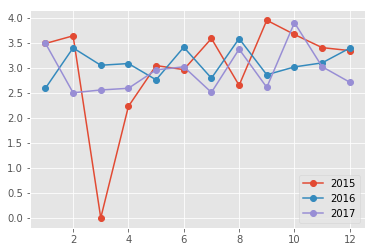

In [48]:
df_SBGR_2015_month_mean = df_SBGR_2015_month.mean()
df_SBGR_2016_month_mean = df_SBGR_2016_month.mean()
df_SBGR_2017_month_mean = df_SBGR_2017_month.mean()


tempdf = df_SBGR_2016_month_mean.append(df_SBGR_2017_month_mean)
tempdf = tempdf.append(df_SBGR_2015_month_mean)
df_SBGR_2017_2016 = pd.DataFrame(tempdf)
pv = pd.pivot_table(df_SBGR_2017_2016 , index=df_SBGR_2017_2016 .index.month, columns=df_SBGR_2017_2016 .index.year,
                    values='error_wind', aggfunc='sum')
pv.plot(style='-o')

## Analysis of southeast Brazil airports 2015, 2016, 2017

In [33]:
import os

years = ['2015','2016','2017']
file_airports = './../Documents/BR_airports/'
regions = os.listdir(file_airports)

br_airports = []
for region in regions:
    with open(file_airports + region, 'r') as f:
        lines = f.read().split('\n')
        if '' in lines: lines.remove('')
        br_airports+=lines 

In [145]:
import os

def getMetarTafDF2(csv_name, year,fdir = '../3.DBGenerator/output/' ):
    dirname = fdir + year + '/' + csv_name
    airdf = pd.read_csv(dirname,index_col=0,parse_dates=[0])
    airdf = airdf.where(airdf.taf_wind<99)
    airdf = airdf.where(airdf.metar_wind<99)
    airdf['error_wind'] =  abs(airdf['metar_wind'] - airdf['taf_wind']) 
    return airdf


file_output = './../3.DBGenerator/output/'
years = os.listdir(file_output)

nan_limits = 20000000
# dict_airports_rmse[year][air,rmse,[lat,long],df]
dict_airports_rmse = dict.fromkeys(years)
for year in years:
    print(year)
    csv_names = os.listdir(file_output + '/' + year)
    for csv_name in csv_names:
        #print(csv_name)
        df_csv = getMetarTafDF2(csv_name,year)
        # elimina csv com muitos NaN
        #print( csv_name, df_csv.isnull().sum().sum())
        if ( nan_limits > df_csv.isnull().sum().sum()):
            if dict_airports_rmse[year] is None:
                dict_airports_rmse[year] = []
            dict_airports_rmse[year].append([csv_name.split('_')[0],np.nan,[np.nan,np.nan],df_csv]) 

2016
2017
2015


In [146]:
for year in years:
   print( year,len(dict_airports_rmse[year]) )


2016 42
2017 42
2015 42


In [147]:
from pyairports.airports import Airports

def getICAOlla(icao):
    all_airps = Airports().airports
    for iata in all_airps:
        a = all_airps[iata]
        if a.icao==icao:
            lat = float(a.lat)
            lon = float(a.lon)
            return [lat,lon]
    return [np.nan,np.nan]

def rmse_metar_error(cur_df,wind_cut=15):
    cur_df = cur_df[['metar_wind','error_wind']]
    cur_df = cur_df[cur_df.metar_wind>wind_cut]
    s = (cur_df.error_wind**2).sum()
    l = len(cur_df.error_wind)
    rmse = np.nan
    if l!=0:
        rmse = (s/l)**0.5
    return rmse

for year in years:
    for data in dict_airports_rmse[year]:
        air,cur_df = data[0],data[3]        
        data[2] = getICAOlla(air)
        data[1] = rmse_metar_error(cur_df)

print('SBGR[lat,log]', getICAOlla('SBGR'))
print(dict_airports_rmse['2016'][0][0:3])

SBGR[lat,log] [-23.432075, -46.469511]
['SBEC', nan, [nan, nan]]


In [216]:
import folium
import math
from matplotlib import cm
from colour import Color

def maprmse(year, dict_airports_rmse):
    brasil = folium.Map(
    location=[-20.1237611, -44.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start=6.2)
    
    y = np.array(range(1000))
    colors = cm.rainbow(y /1000.0)
    
    for data in dict_airports_rmse[year]:
        lat_lon = data[2]
        rmse = data[1]
        if (not math.isnan(rmse)) and not (np.nan in lat_lon):
            #print(rmse)
            c = Color(rgb=colors[int(rmse*10)][0:3])
            folium.Circle(
                location=lat_lon,
                radius = 20000,
                color = c.get_hex(),
                fill_color = c.get_hex() ,
                popup = str(rmse)
            ).add_to(brasil)

    return brasil

brasil_2015 = maprmse('2015',dict_airports_rmse)
brasil_2016 = maprmse('2016',dict_airports_rmse)
brasil_2017 = maprmse('2017',dict_airports_rmse)

In [223]:
brasil_2015.save("brasil_2015.html")
brasil_2016.save("brasil_2016.html")
brasil_2017.save("brasil_2017.html")

In [225]:
from IPython.core.display import display, HTML
display(brasil_2015)


In [227]:
%%html
<a href="brasil_2015.html">brasil_2015 link</a>

In [232]:
from IPython.core.display import display, HTML
display(brasil_2015.html)

AttributeError: 'Map' object has no attribute 'html'

In [ ]:
pritn